# Visualize Baby Sleep

In [6]:
from csv import reader
import datetime

import numpy as np
import matplotlib.pyplot as plt

# %matplotlib tk
%matplotlib notebook

In [2]:
a = datetime.datetime.strptime("3/4/22", "%m/%d/%y").date()
print(a)

2022-03-04


`starts` is a list (one entry for each day) of lists of starting time (in mins past midnight) for each sleep session. `durations` is the same format with the length in minutes of each sleep session

In [3]:
fname = "sleepdata.csv"

dates = []
starts = []
durations = []

with open(fname, "r") as fin:
    lines = reader(fin)
    
    for line in lines:
        date_str = line
        start_str = next(lines)
        duration_str = next(lines)
        
        dates.append(datetime.datetime.strptime(date_str[0], "%m/%d/%y").date())
        
        start = []
        duration = []
        for ss, ds in zip(start_str, duration_str):
            if not ss or not ds:
                break
                
            start_hr, start_mi = ss.split(":")
            dur_hr, dur_mi = ds.split(".")
            
            start.append(int(start_hr)*60 + int(start_mi))
            duration.append(int(dur_hr)*60 + int(dur_mi))
            
        starts.append(start)
        durations.append(duration)

`startend` is a list of lists containing start and end times for each sleep session. `cumulative` is a list of lists of cumulative sleep time for the day at each start/end time

In [4]:
startends = []
cumulatives = []

for start, duration in zip(starts, durations):
    startend = []
    cumulative = []
    
    c = 0
    
    for s, d in zip(start, duration):
        startend.append(s)
        startend.append(s+d)
        cumulative.append(c)
        cumulative.append(c+d)
        c += d
        
    startends.append(startend)
    cumulatives.append(cumulative)

<IPython.core.display.Javascript object>


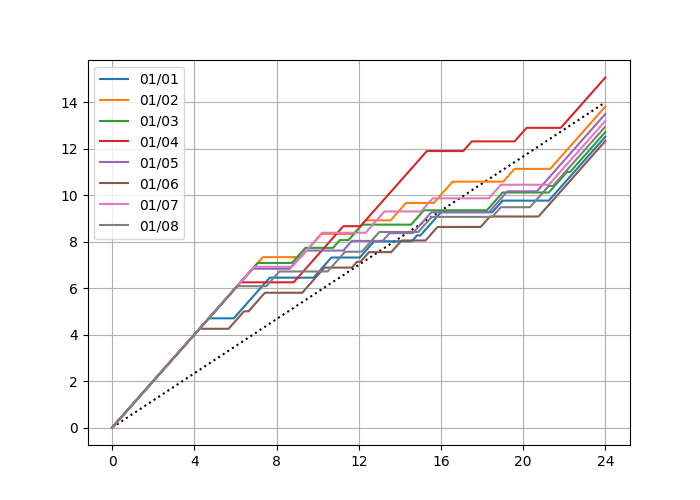

In [10]:
# plotting looks better in hours
startends_hr = [[se/60. for se in startend] for startend in startends]
cumulatives_hr = [[cc/60. for cc in cumulative] for cumulative in cumulatives]

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

target = 14
ax.plot([0, 24], [0, target], "k:")

for date, startend, cumulative in zip(dates, startends_hr, cumulatives_hr):
    ax.plot(startend, cumulative, label=date.strftime("%m/%d"))
    
ax.set_xticks([0, 4, 8, 12, 16, 20, 24])
    
ax.grid("on")
ax.legend()
plt.show()

In [9]:
sleephist = np.zeros(shape=(1440,))

for startend in startends:
    i = 0
    while i < len(startend):
        start = startend[i]
        end = startend[i+1]
        i += 2
        
        sleephist[start:end] += 1

<IPython.core.display.Javascript object>


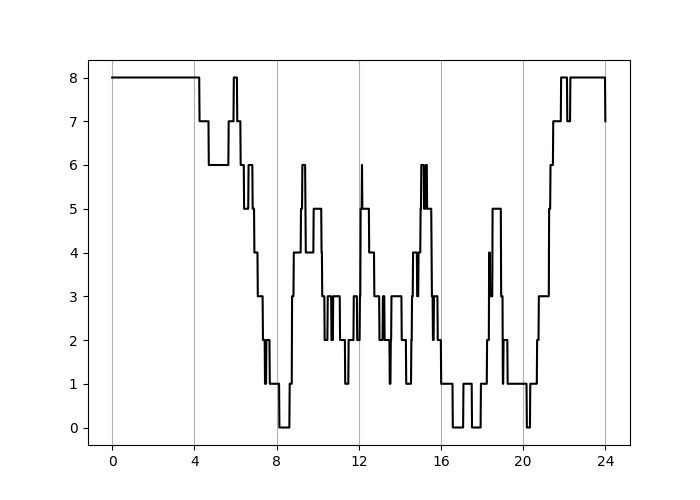

In [14]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax.plot(np.linspace(0, 24, 1440), sleephist, "k")

ax.set_xticks([0, 4, 8, 12, 16, 20, 24])
ax.xaxis.grid(True)

plt.show()